## Q) Forecast the CocaCola prices data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cocacola = pd.read_excel("C:\\Users\\Lenovo\\Desktop\\ExcelR\\Data Science Assignments\\18_Forecasting\\CocaCola_Sales_Rawdata.xlsx")
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
cocacola["quarter"] = 0
cocacola.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,0
1,Q2_86,2244.960999,0
2,Q3_86,2533.804993,0
3,Q4_86,2154.962997,0
4,Q1_87,1547.818996,0


In [5]:
cocacola.shape

(42, 3)

In [6]:
for i in range(42):
    n=cocacola['Quarter'][i]
    cocacola['quarter'][i]=n[0:2]
cocacola.head()

<ipython-input-6-68207e848353>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocacola['quarter'][i]=n[0:2]
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [7]:
dummy = pd.DataFrame(pd.get_dummies(cocacola["quarter"]))

In [8]:
coca = pd.concat((cocacola,dummy),axis=1)
coca

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [9]:
coca["t"] = np.arange(1,43)
coca["t_squared"] = coca["t"]*coca["t"]
coca.columns

Index(['Quarter', 'Sales', 'quarter', 'Q1', 'Q2', 'Q3', 'Q4', 't',
       't_squared'],
      dtype='object')

In [10]:
coca["log_Sales"] = np.log(coca["Sales"])
coca.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


<AxesSubplot:>

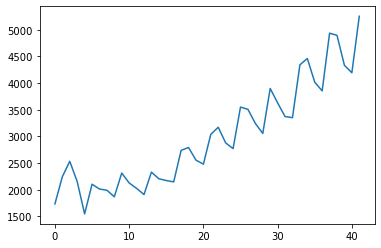

In [11]:
coca.Sales.plot()

<AxesSubplot:xlabel='quarter', ylabel='Sales'>

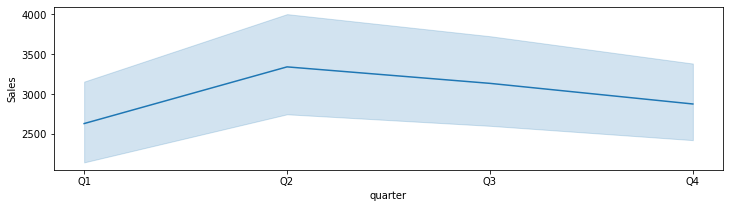

In [12]:
plt.figure(figsize=(12,3))
sns.lineplot(x="quarter",y="Sales",data=cocacola)

In [13]:
# Splitting the Dataset :

train= coca.head(38)
test=coca.tail(4)

In [14]:
import statsmodels.formula.api as smf

In [17]:
# Linear Model :

linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

591.5532957223963

In [18]:
#Exponential

Exp = smf.ols('log_Sales~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

466.24797310672346

In [19]:
#Quadratic 

Quad = smf.ols('Sales~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

475.56183518315095

In [20]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1860.0238154547283

In [22]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1','Q2','Q3','Q4','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

301.73800719352977

In [23]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1963.3896400779709

In [24]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

225.5243904982721

In [25]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,225.524390
4,rmse_add_sea_quad,301.738007
1,rmse_Exp,466.247973
2,rmse_Quad,475.561835
0,rmse_linear,591.553296
3,rmse_add_sea,1860.023815
5,rmse_Mult_sea,1963.389640


In [31]:
# Predict for new time peroid :

final_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=coca).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     258.5
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           3.79e-27
Time:                        09:44:46   Log-Likelihood:                -272.50
No. Observations:                  42   AIC:                             557.0
Df Residuals:                      36   BIC:                             567.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1585.0739     67.108     23.620      0.000    1448.973    1721.175
t             -2.6187      9.002     -0.291      0.773     -20.875      15.638
t_squared      1.7581      0.203      8.658      0.000       1.346       2.170
Q1            42.3795     47.220      0.897      0.375     -53.386     138.145
Q2           681.5337     47.654     14.302      0.000     584.887     778.180
Q3           596.6456     50.365     11.846      0.000     494.501     698.790
Q4           264.5151     50.772      5.210      0.000     161.544     367.486
==============================================================================
Omnibus:                        0.809   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.829
Skew:                          -0.153   Prob(JB):                        0.661
Kurtosis:                       2.383   Cond. No.                     4.08e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.67e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Auto - ARIMA

In [32]:
from pandas import read_csv
from matplotlib import pyplot
import pandas as pd
import numpy as np
import statsmodels.api as smf

In [86]:
cocacola1 = coca.iloc[:,1:]
cocacola1["quarter"].replace({"Q1":1,"Q2":2,"Q3":3,"Q4":4}, inplace=True)
cocacola1.drop(["Q1","Q2","Q3","Q4","t","t_squared","log_Sales"],axis="columns",inplace=True)
cocacola1.head()

,Sales,quarter
0,1734.827000,1
1,2244.960999,2
2,2533.804993,3
3,2154.962997,4
4,1547.818996,1


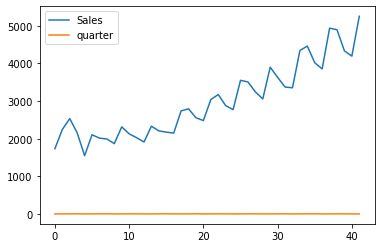

In [87]:
#Line plt for time series :
cocacola1.plot()
pyplot.show()

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'quarter'}>]], dtype=object)

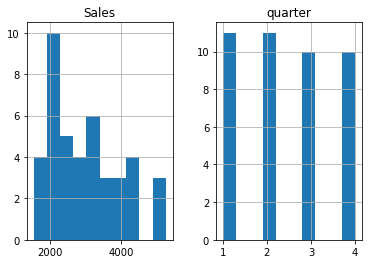

In [88]:
cocacola1.hist()

<AxesSubplot:ylabel='Density'>

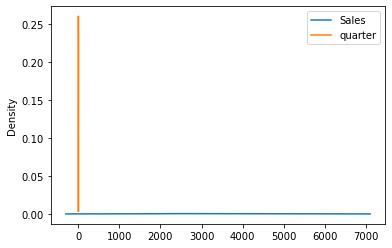

In [112]:
cocacola1.plot(kind="kde")

### Seperate out a Validation Dataset :

In [90]:
split_plot = len(cocacola1) - 10
dataset, validation = cocacola1[0:split_plot], cocacola1[split_plot:]
print("Dataset %d, Validation %d" % (len(dataset),len(validation)))
dataset.to_csv("dataset.csv", header=False)
validation.to_csv("validation.csv", header=False)

Dataset 32, Validation 10


In [91]:
from statsmodels.tsa.arima_model import ARIMA

# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  wa

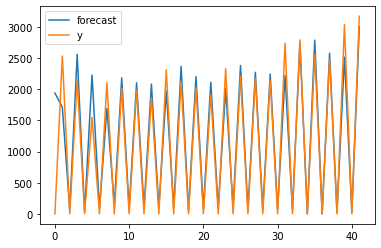

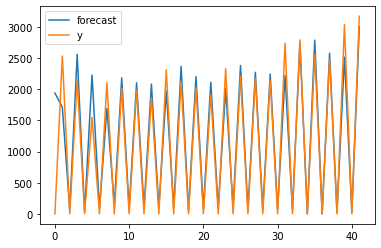

In [111]:
# fit model
model = ARIMA(X.reshape(-1).tolist(), order=(3,0,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 42)

In [104]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

3415.609059013086

In [107]:
## Combine train and test data and build final model :
from pandas import read_excel
# fit model
data = read_excel('CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  wa

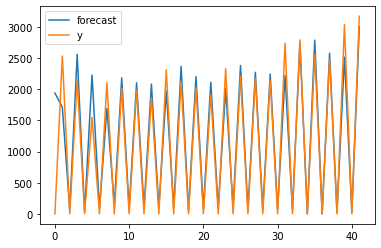

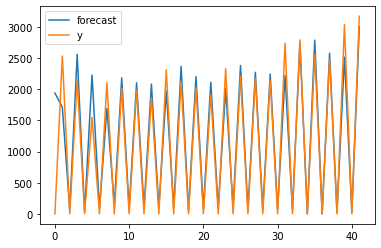

In [110]:
model = ARIMA(X.reshape(-1).tolist(), order=(3,0,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,42)